In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [87]:
ndvi=gdal.Open('E:\\NDVI2016DEC.tif')
srt=gdal.Open('E:\\LC08_L1TP_146044_20161215_20170316_01_T1_sr_band6.tif')

In [88]:
ndvi1=ndvi.ReadAsArray()
srt1=srt.ReadAsArray()
ndvi2=np.array(ndvi1)
ndvi2=ndvi2[2000:5000,2000:5000]
ndvi2=np.reshape(ndvi2,-1)
srt2=np.array(srt1)
srt2=srt2[2000:5000,2000:5000]
srt2=np.reshape(srt2,-1)
srt=((1-srt2*0.0001)**2)/(0.0002*srt2)
data=pd.DataFrame({"ndvi":ndvi2,'srt':srt})
data.info

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


<bound method DataFrame.info of              ndvi       srt
0        0.217009  1.457079
1        0.209605  1.423837
2        0.218116  1.360363
3        0.210719  1.413660
4        0.196644  1.448670
...           ...       ...
8999995  0.259339  0.766494
8999996  0.298067  0.875153
8999997  0.339187  0.879006
8999998  0.337237  0.843991
8999999  0.302793  1.209901

[9000000 rows x 2 columns]>

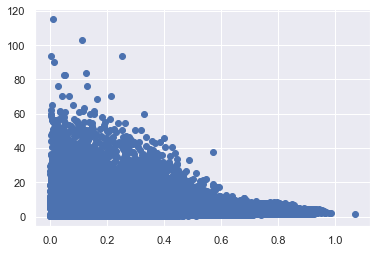

In [95]:
data3=data[data['ndvi']>0 ]
data3=data3[data3['srt']<200]
data4=data3[data3['srt']>-100]

plt.scatter(data4['ndvi'],data4['srt'])


In [114]:
data1=data4.round({'ndvi':2})
sort=data1.sort_values(by='srt',ascending=False).drop_duplicates(['ndvi'])
#data2=sort.groupby(['ndvi']).head(2)
data2=sort.sort_values(by='ndvi',ascending=True)
data2.head(20)

,ndvi,srt
8712531,0.00,93.342273
3534217,0.01,115.281220
75434,0.02,56.475614
7209346,0.03,75.926327
333486,0.04,70.432071
8709532,0.05,82.336333
153422,0.06,49.510001
282440,0.07,70.432071
240398,0.08,64.793274
105397,0.09,55.822582


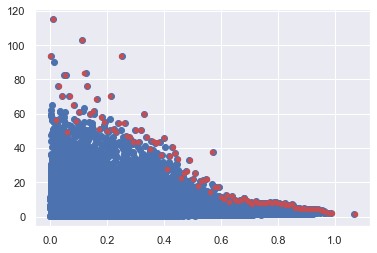

In [115]:
plt.scatter(data4['ndvi'],data4['srt'])
plt.scatter(data2['ndvi'],data2['srt'],c='r', s=20)
plt.show()

In [117]:
x1=data2['ndvi']
y=data2['srt']
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    srt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     546.6
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           4.25e-42
Time:                        04:08:52   Log-Likelihood:                -381.50
No. Observations:                 101   AIC:                             767.0
Df Residuals:                      99   BIC:                             772.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.7570      2.105     35.515      0.000      70.580      78.934
ndvi         -84.8459      3.629    -23.380      0.000     -92.047     -77.645
==============================================================================
Omnibus:                       41.469   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.384
Skew:                           1.538   Prob(JB):                     1.59e-22
Kurtosis:                       6.793   Cond. No.                         4.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

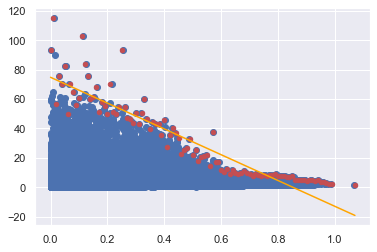

In [118]:
dry_edge=-87.8459*x1+74.757
plt.scatter(data4['ndvi'],data4['srt'])
plt.scatter(data2['ndvi'],data2['srt'],c='r', s=20)
plt.plot(x1,dry_edge,c='orange')
plt.show()